# Volatility Bollinger Bands

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from ta.volatility import BollingerBands


In [2]:
df = pd.read_csv("../data/BTCUSDT-volume-bars.csv")
df = df.set_index(pd.to_datetime(df.time)).drop(["time"], axis=1)

In [3]:
# df = df[-1_000_000:]

In [4]:
df

,open,high,low,close,volume
time,,,,,
2017-08-16 21:21:13.356,4261.48,4280.56,4261.48,4266.29,5.002297
2017-08-16 21:29:19.766,4266.29,4270.41,4261.32,4267.47,5.356629
2017-08-16 21:33:00.057,4261.45,4280.56,4261.45,4267.99,7.935627
2017-08-16 21:39:32.027,4296.63,4300.38,4296.63,4300.38,5.027790
2017-08-16 21:43:05.191,4300.38,4300.38,4300.38,4300.38,5.109679
...,...,...,...,...,...
2021-06-19 09:27:04.502,35831.71,35844.86,35831.71,35841.54,5.539350
2021-06-19 09:27:20.667,35841.57,35841.58,35822.03,35823.32,5.033671
2021-06-19 09:27:26.627,35823.32,35833.69,35823.32,35826.83,5.425236


In [5]:
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "bb_"
    for w in windows:
        end = str(w)
        bb = BollingerBands(df["close"], window=w, window_dev=2)
        df[name + "pband_" + end] = bb.bollinger_pband() #percentage band
        df[name + "wband_" + end] = bb.bollinger_wband() #width band

In [6]:
variations([100, 1000, 10_000, 100_000])

In [7]:
df.tail()

,open,high,low,close,volume,bb_pband_100,bb_wband_100,bb_pband_1000,bb_wband_1000,bb_pband_10000,bb_wband_10000,bb_pband_100000,bb_wband_100000
time,,,,,,,,,,,,,
2021-06-19 09:27:04.502,35831.71,35844.86,35831.71,35841.54,5.539350,0.313741,0.682907,0.027024,1.376477,0.604882,3.910354,0.125221,17.771711
2021-06-19 09:27:20.667,35841.57,35841.58,35822.03,35823.32,5.033671,0.243640,0.675365,-0.008077,1.378834,0.591803,3.910273,0.122548,17.771610
2021-06-19 09:27:26.627,35823.32,35833.69,35823.32,35826.83,5.425236,0.262042,0.666352,0.000512,1.381109,0.594292,3.910198,0.123059,17.771507
2021-06-19 09:27:44.405,35824.84,35852.23,35823.55,35847.95,5.001377,0.354218,0.657452,0.044140,1.382737,0.609398,3.910150,0.126151,17.771402
2021-06-19 09:27:48.270,35833.20,35848.03,35830.00,35839.87,5.056933,0.323947,0.651838,0.029278,1.384593,0.603585,3.910116,0.124964,17.771296


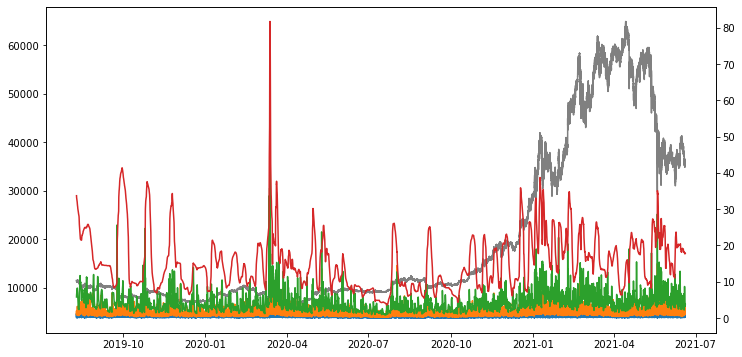

In [8]:
plot = df[-8_000_000:]
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(plot.close, color="gray")

ax1 = ax.twinx()
ax1.plot(plot.bb_wband_100)
ax1.plot(plot.bb_wband_1000)
ax1.plot(plot.bb_wband_10000)
ax1.plot(plot.bb_wband_100000)



In [9]:
df.drop(["open", "high", "low", "close", "volume"], axis=1, inplace=True, errors='ignore')
df.to_csv("../data/BTCUSDT-volume-bars-v-bb.csv")